In [1]:
# pandas中的绘图函数
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

%matplotlib inline

In [2]:
# 线型图

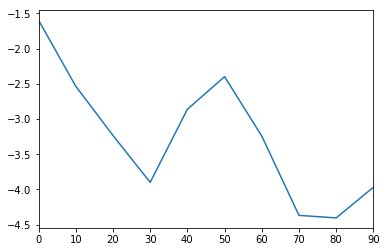

In [3]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

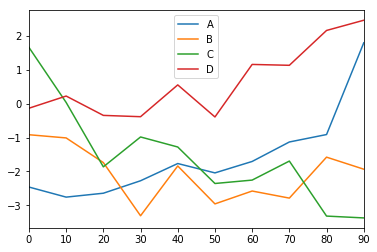

In [4]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot() # 每一列是一条曲线

In [5]:
# Series.plot方法的参数
# label
# ax：       绘制的subplot对象
# style
# alpha
# kind：     图像类型：line/bar/barh/kde
# logy
# use_index：将对象的索引用作刻度标签
# rot：      旋转刻度标签
# xticks
# yticks
# xlim
# ylim
# grid

In [6]:
# 专用于DataFrame.plot方法的参数
# subplots：    将各个DataFrame列绘制到单独的subplot中
# sharex/y
# figsize
# title
# legend
# sort_columns：以字母顺序绘制各列

In [7]:
# 柱状图

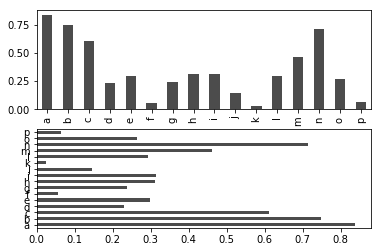

In [8]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

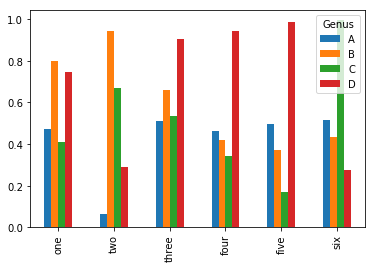

In [9]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot(kind='bar') # 默认并列柱状图

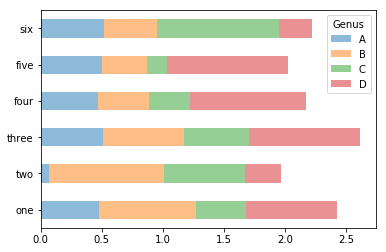

In [10]:
df.plot(kind='barh', stacked=True, alpha=0.5) #  stacked=True表示堆叠柱状图

In [11]:
tips = pd.read_csv('../data/tips.csv')
# 书上的写法有问题，tips.size返回记录条数，而不是取'size'列。
party_counts = pd.crosstab(tips['day'], tips['size']) # 根据day和size做group然后计数
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [12]:
party_counts = party_counts.iloc[:, 1:5] # 取人数2-5的聚会
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [13]:
# 先对每一行求和
# 然后沿着行的方向每行各个元素除对应行的和
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


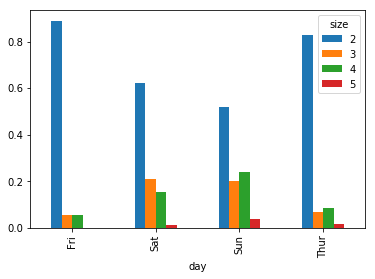

In [14]:
party_pcts.plot(kind='bar')

In [15]:
# 直方图和密度图

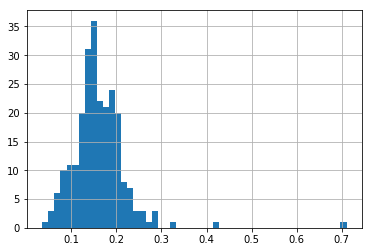

In [16]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50) # 消费金额比例的分布,貌似15%的比例最高。

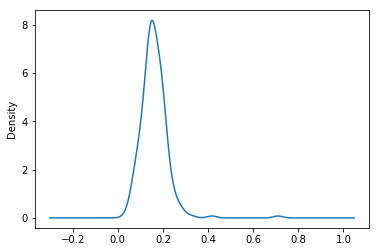

In [17]:
tips['tip_pct'].plot(kind='kde') # 概率密度曲线

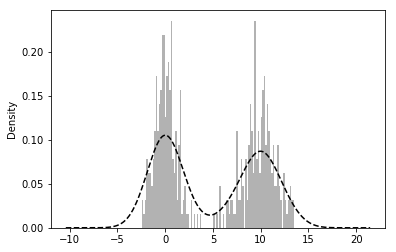

In [18]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)
values = Series(np.concatenate([comp1, comp2])) # 连城400个元素的Series
values.hist(bins=100, alpha=0.3, color='k', normed=True) # 归一化后直方图
values.plot(kind='kde', style='k--') # 画在同一个plot上

In [19]:
# 散布图

In [20]:
macro = pd.read_csv('../data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna() # 对数运算后求差值
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


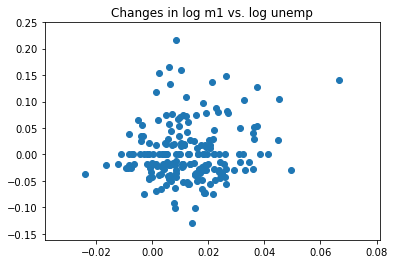

In [21]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAF1DE6588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DAF23AFCC0>]], dtype=object)

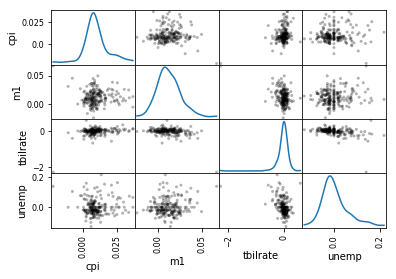

In [22]:
pd.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3) # 任意2个指标的散点图，主对角线画密度函数。